# Arbitrary Value Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### Performing Train Test Split

In [5]:
x = df.drop(columns= ['Survived'])
y = df['Survived']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [8]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_-1'] = x_train['Age'].fillna(-1)
x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_-1']= x_train['Fare'].fillna(-1)

In [9]:
x_train.sample(4)

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
477,29.0,7.0458,1,29.0,29.0,7.0458,7.0458
235,NaN,7.5500,0,99.0,-1.0,7.5500,7.5500
301,NaN,23.2500,2,99.0,-1.0,23.2500,23.2500
778,NaN,7.7375,0,99.0,-1.0,7.7375,7.7375


### Review Variance

In [10]:
print('Original Age Variable variance: ', x_train['Age'].var(), '\n'
     'Age variance after using 99 for imputation: ', x_train['Age_99'].var(), '\n'
     'Age variance after using -1 for imputaion: ', x_train['Age_-1'].var(), '\n'
     'Original Fare variable variance; ', x_train['Fare'].var(), '\n'
     'Fare variance after using 999 for imputation: ', x_train['Fare_999'].var(), '\n'
     'Fare variance after using -1 for imputation: ', x_train['Fare_-1'].var())

Original Age Variable variance:  204.34951339046142 
Age variance after using 99 for imputation:  951.7275570187188 
Age variance after using -1 for imputaion:  318.0896202624488 
Original Fare variable variance;  2448.1979137063163 
Fare variance after using 999 for imputation:  47219.202652176304 
Fare variance after using -1 for imputation:  2378.5676784883494


### Review Distribution Age

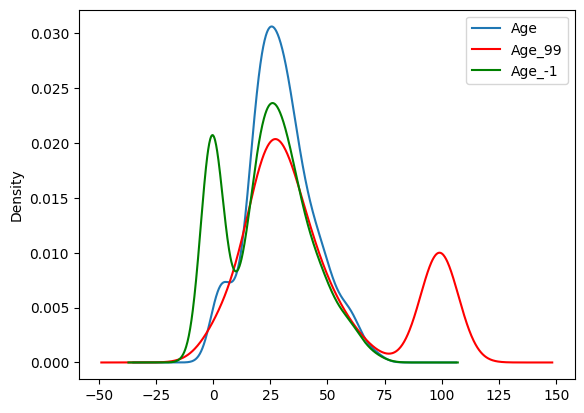

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind = 'kde', ax = ax, legend= True)
x_train['Age_99'].plot(kind = 'kde', ax = ax, legend = True, color = 'red')
x_train['Age_-1'].plot(kind = 'kde', ax = ax, legend = True, color = 'green')
plt.show()

### Review Distribution Fare

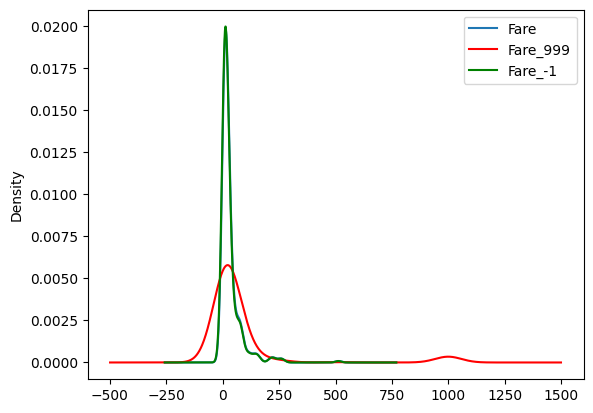

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind = 'kde', ax = ax, legend= True)
x_train['Fare_999'].plot(kind = 'kde', ax = ax, legend = True, color = 'red')
x_train['Fare_-1'].plot(kind = 'kde', ax = ax, legend = True, color = 'green')
plt.show()

### Check Covariance

In [13]:
x_train.cov().round(3)

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
Age,204.350,70.719,-6.499,204.350,204.350,162.793,63.321
Fare,70.719,2448.198,17.259,-101.671,125.558,2448.198,2448.198
Family,-6.499,17.259,2.735,-7.387,-4.149,11.529,16.554
Age_99,204.350,-101.671,-7.387,951.728,-189.536,-159.932,-94.317
Age_-1,204.350,125.558,-4.149,-189.536,318.090,257.380,114.394
Fare_999,162.793,2448.198,11.529,-159.932,257.380,47219.203,762.475
Fare_-1,63.321,2448.198,16.554,-94.317,114.394,762.475,2378.568


### Check Correlation

In [14]:
x_train.corr().round(3)

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
Age,1.000,0.093,-0.299,1.000,1.000,0.051,0.085
Fare,0.093,1.000,0.208,-0.066,0.142,1.000,1.000
Family,-0.299,0.208,1.000,-0.145,-0.141,0.032,0.205
Age_99,1.000,-0.066,-0.145,1.000,-0.344,-0.024,-0.063
Age_-1,1.000,0.142,-0.141,-0.344,1.000,0.066,0.132
Fare_999,0.051,1.000,0.032,-0.024,0.066,1.000,0.072
Fare_-1,0.085,1.000,0.205,-0.063,0.132,0.072,1.000
